In [1]:
import pandas as pd
import os

In [2]:
#Répertoire du fichier des données
PROCESSED_DIR = '../data/processed/'

#Table principale
ALL_DATA_FILE = 'all_data.csv'

In [3]:
epidemie_df = (pd.read_csv(os.path.join(PROCESSED_DIR, ALL_DATA_FILE), parse_dates=['Last Update']).assign(day=lambda _df:_df['Last Update'].dt.date))

In [4]:
epidemie_df = (pd.read_csv(os.path.join(PROCESSED_DIR, ALL_DATA_FILE), parse_dates=['Last Update'])
               .assign(day=lambda _df: _df['Last Update'].dt.date))

In [5]:
epidemie_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
0,Hubei,Mainland China,2020-02-26 14:13:10,65187.0,2615.0,20969.0,30.9756,112.2707,02-26-2020.csv,2020-02-26
1,Guangdong,Mainland China,2020-02-26 10:33:02,1347.0,7.0,851.0,23.3417,113.4244,02-26-2020.csv,2020-02-26
2,Henan,Mainland China,2020-02-26 10:33:02,1271.0,19.0,1033.0,33.8820,113.6140,02-26-2020.csv,2020-02-26
3,NaN,South Korea,2020-02-26 11:03:11,1261.0,12.0,22.0,36.0000,128.0000,02-26-2020.csv,2020-02-26
4,Zhejiang,Mainland China,2020-02-26 10:33:02,1205.0,1.0,867.0,29.1832,120.0934,02-26-2020.csv,2020-02-26


In [6]:
epidemie_df.dtypes

Province/State            object
Country/Region            object
Last Update       datetime64[ns]
Confirmed                float64
Deaths                   float64
Recovered                float64
Latitude                 float64
Longitude                float64
source                    object
day                       object
dtype: object

In [7]:
epidemie_df['Country/Region'].value_counts()

Mainland China         1517
US                     1503
China                   330
Australia               305
Canada                  230
                       ... 
North Ireland             1
Republic of Moldova       1
Ivory Coast               1
Cabo Verde                1
Haiti                     1
Name: Country/Region, Length: 206, dtype: int64

# Epidémie en France

In [8]:
import seaborn as sns

sns.set() #afficher les graphiques avec le look de Seaborn

In [9]:
%matplotlib inline

In [10]:
epidemie_df[(epidemie_df['Country/Region'] == 'France') & (epidemie_df['Province/State'] == 'France')].sort_values('day', ascending=False)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
6139,France,France,2020-03-20 22:43:03,12612.0,450.0,12.0,46.2276,2.2137,03-20-2020.csv,2020-03-20
4313,France,France,2020-03-19 20:43:02,10871.0,243.0,12.0,46.2276,2.2137,03-19-2020.csv,2020-03-19
4605,France,France,2020-03-18 18:33:02,9043.0,148.0,12.0,46.2276,2.2137,03-18-2020.csv,2020-03-18
2181,France,France,2020-03-17 19:13:08,7652.0,148.0,12.0,46.2276,2.2137,03-17-2020.csv,2020-03-17
2457,France,France,2020-03-16 20:13:11,6633.0,148.0,12.0,46.2276,2.2137,03-16-2020.csv,2020-03-16
5478,France,France,2020-03-15 18:20:18,4499.0,91.0,12.0,46.2276,2.2137,03-15-2020.csv,2020-03-15
5229,France,France,2020-03-14 20:13:16,4469.0,91.0,12.0,46.2276,2.2137,03-14-2020.csv,2020-03-14
567,France,France,2020-03-11 22:53:03,2281.0,48.0,12.0,46.2276,2.2137,03-11-2020.csv,2020-03-11
3526,France,France,2020-03-11 20:00:00,3661.0,79.0,12.0,46.2276,2.2137,03-13-2020.csv,2020-03-11
3681,France,France,2020-03-11 22:53:03,2281.0,48.0,12.0,46.2276,2.2137,03-12-2020.csv,2020-03-11


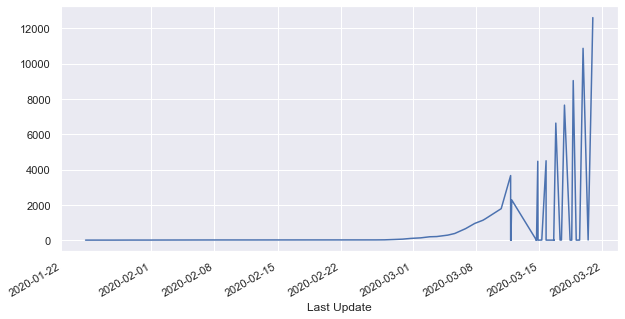

In [11]:
epidemie_df[epidemie_df['Country/Region'] == 'France'].set_index('Last Update')['Confirmed'].plot(figsize=(10,5));

In [12]:
epidemie_df[epidemie_df['Country/Region'] == 'Germany']

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
40,NaN,Germany,2020-02-26 23:43:03,27.0,0.0,15.0,51.0000,9.0000,02-26-2020.csv,2020-02-26
137,NaN,Germany,2020-02-27 23:13:04,46.0,0.0,16.0,51.0000,9.0000,02-27-2020.csv,2020-02-27
244,NaN,Germany,2020-02-18 17:03:03,16.0,0.0,12.0,51.0000,9.0000,02-18-2020.csv,2020-02-18
319,NaN,Germany,2020-02-18 17:03:03,16.0,0.0,12.0,51.0000,9.0000,02-19-2020.csv,2020-02-18
363,NaN,Germany,2020-03-10 18:53:02,1457.0,2.0,18.0,51.0000,9.0000,03-10-2020.csv,2020-03-10
569,NaN,Germany,2020-03-11 19:13:17,1908.0,3.0,25.0,51.0000,9.0000,03-11-2020.csv,2020-03-11
817,NaN,Germany,2020-02-11 19:33:03,16.0,0.0,0.0,51.0000,9.0000,02-12-2020.csv,2020-02-11
890,NaN,Germany,2020-02-13 15:13:11,16.0,0.0,1.0,51.0000,9.0000,02-13-2020.csv,2020-02-13
937,NaN,Germany,2020-03-07 17:43:05,799.0,0.0,18.0,51.0000,9.0000,03-07-2020.csv,2020-03-07
1163,NaN,Germany,2020-03-06 17:53:03,670.0,0.0,17.0,51.0000,9.0000,03-06-2020.csv,2020-03-06


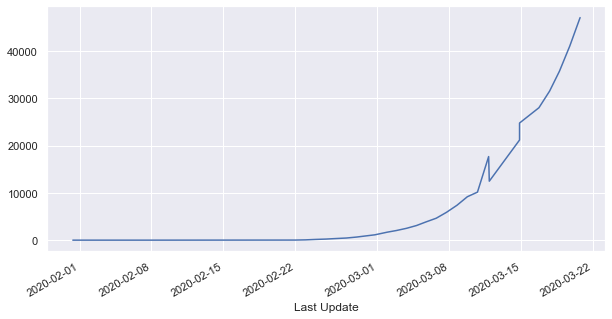

In [13]:
epidemie_df[epidemie_df['Country/Region'] == 'Italy'].set_index('Last Update')['Confirmed'].plot(figsize=(10,5));

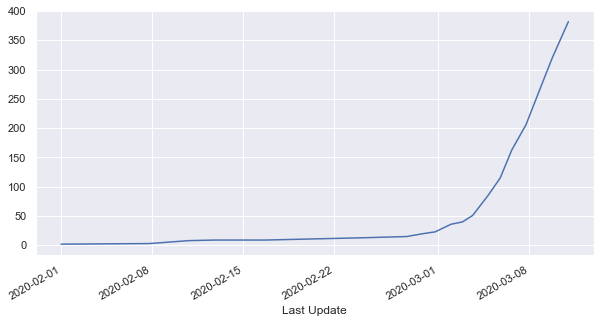

In [14]:
epidemie_df[epidemie_df['Country/Region'] == 'UK'].set_index('Last Update')['Confirmed'].plot(figsize=(10,5));

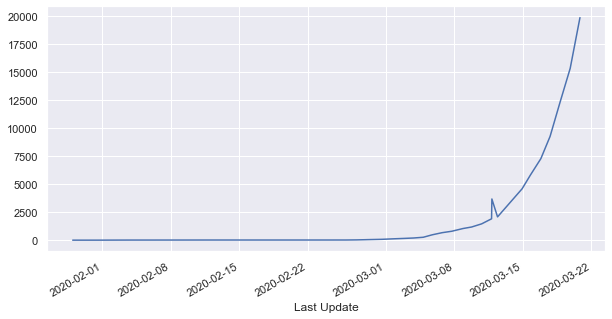

In [15]:
epidemie_df[epidemie_df['Country/Region'] == 'Germany'].set_index('Last Update')['Confirmed'].plot(figsize=(10,5));

In [16]:
france_df = (epidemie_df[epidemie_df['Country/Region'] == 'France']
                          .drop_duplicates(subset=['Province/State', 'day'])
             .groupby(by=['Country/Region', 'day'])
             .agg({'Confirmed': 'sum', 'Deaths':'sum', 'Recovered':'sum'})
             .reset_index()
            )
                          

In [17]:
france_df.head(), france_df.tail()

(  Country/Region         day  Confirmed  Deaths  Recovered
 0         France  2020-01-24        2.0     0.0        0.0
 1         France  2020-01-25        3.0     0.0        0.0
 2         France  2020-01-26        3.0     0.0        0.0
 3         France  2020-01-27        3.0     0.0        0.0
 4         France  2020-01-28        4.0     0.0        0.0,
    Country/Region         day  Confirmed  Deaths  Recovered
 30         France  2020-03-16     6645.0   148.0       12.0
 31         France  2020-03-17     7674.0   148.0       12.0
 32         France  2020-03-18     9046.0   148.0       12.0
 33         France  2020-03-19    10883.0   243.0       12.0
 34         France  2020-03-20    12623.0   450.0       12.0)

In [18]:
france_df.set_index('day')['Confirmed']

day
2020-01-24        2.0
2020-01-25        3.0
2020-01-26        3.0
2020-01-27        3.0
2020-01-28        4.0
2020-01-29        5.0
2020-01-30        5.0
2020-01-31        5.0
2020-02-01        6.0
2020-02-08       11.0
2020-02-12       11.0
2020-02-15       12.0
2020-02-25       14.0
2020-02-26       18.0
2020-02-27       38.0
2020-02-28       57.0
2020-02-29      100.0
2020-03-01      130.0
2020-03-02      191.0
2020-03-03      204.0
2020-03-04      285.0
2020-03-05      377.0
2020-03-06      653.0
2020-03-07      949.0
2020-03-08     1126.0
2020-03-09     1209.0
2020-03-10     1784.0
2020-03-11     2287.0
2020-03-14     4481.0
2020-03-15     4509.0
2020-03-16     6645.0
2020-03-17     7674.0
2020-03-18     9046.0
2020-03-19    10883.0
2020-03-20    12623.0
Name: Confirmed, dtype: float64

In [19]:
epidemie_df[(epidemie_df['Country/Region'] == 'France') & (epidemie_df['Province/State'] == 'France')].set_index

<bound method DataFrame.set_index of      Province/State Country/Region         Last Update  Confirmed  Deaths  \
567          France         France 2020-03-11 22:53:03     2281.0    48.0   
2181         France         France 2020-03-17 19:13:08     7652.0   148.0   
2457         France         France 2020-03-16 20:13:11     6633.0   148.0   
3526         France         France 2020-03-11 20:00:00     3661.0    79.0   
3681         France         France 2020-03-11 22:53:03     2281.0    48.0   
4313         France         France 2020-03-19 20:43:02    10871.0   243.0   
4605         France         France 2020-03-18 18:33:02     9043.0   148.0   
5229         France         France 2020-03-14 20:13:16     4469.0    91.0   
5478         France         France 2020-03-15 18:20:18     4499.0    91.0   
6139         France         France 2020-03-20 22:43:03    12612.0   450.0   

      Recovered  Latitude  Longitude          source         day  
567        12.0   46.2276     2.2137  03-11-2020

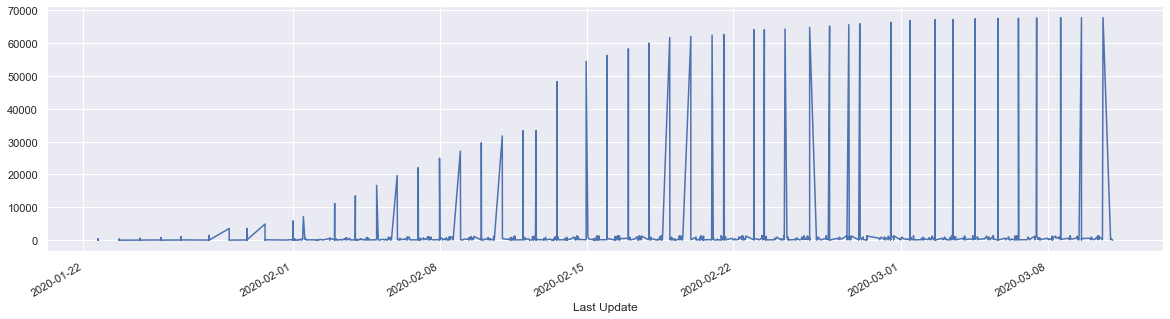

In [20]:
epidemie_df[epidemie_df['Country/Region'] == 'Mainland China'].set_index('Last Update')['Confirmed'].plot(figsize=(20,5));

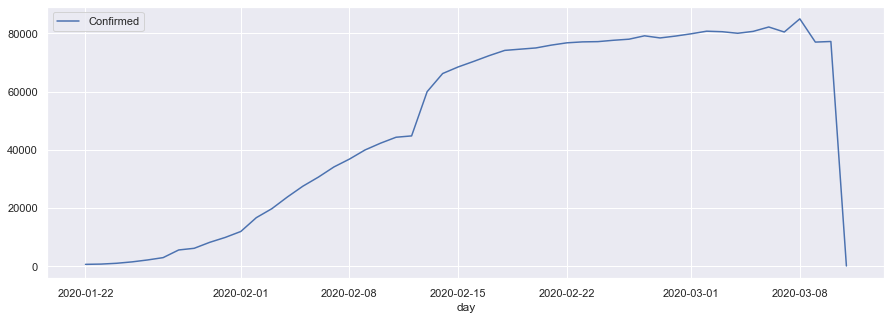

In [21]:
(epidemie_df[epidemie_df['Country/Region'] == 'Mainland China'].groupby('day').agg({'Confirmed': 'sum'})).plot(figsize=(15,5));

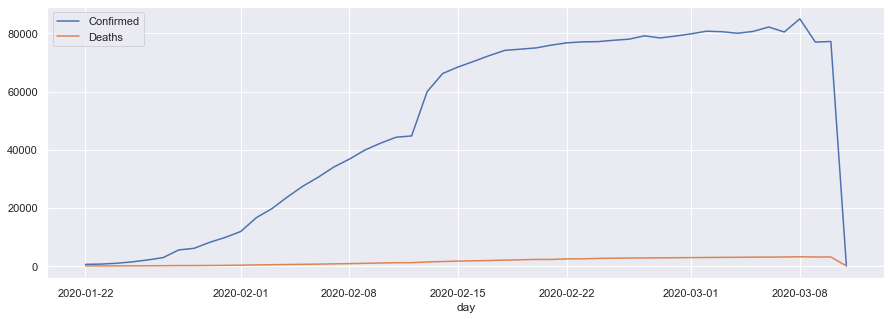

In [22]:
(epidemie_df[epidemie_df['Country/Region'] == 'Mainland China']
 .fillna(value=0)
 .groupby('day').agg({'Confirmed': 'sum', 'Deaths' : 'sum'})).plot(figsize=(15,5));

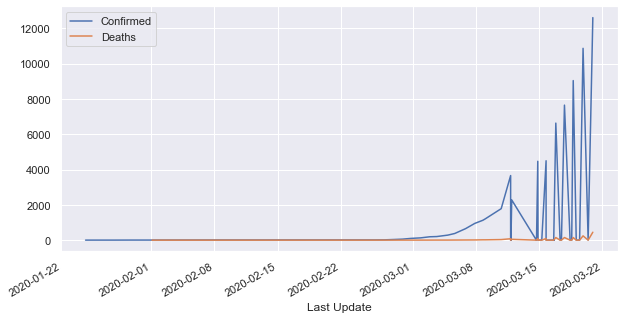

In [23]:
epidemie_df[epidemie_df['Country/Region'] == 'France'].set_index('Last Update')[['Confirmed', 'Deaths']].plot(figsize=(10,5));

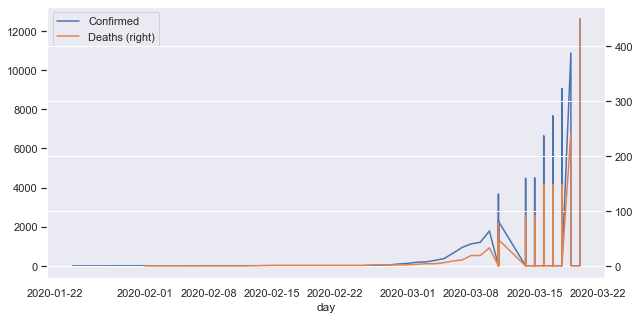

In [24]:
(epidemie_df[epidemie_df['Country/Region'] == 'France']
    .set_index('day')[ ['Confirmed', 'Deaths'] ]
    .plot(secondary_y=['Deaths'], figsize=(10, 5))
);

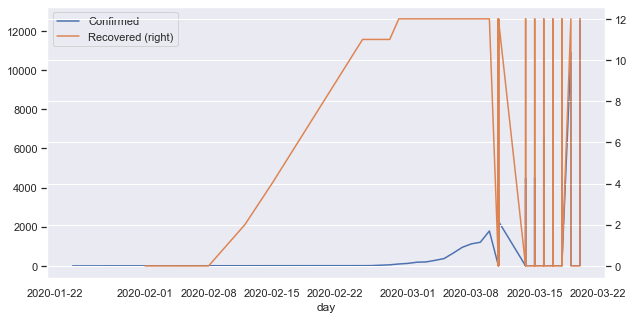

In [25]:
(epidemie_df[epidemie_df['Country/Region'] == 'France']
    .set_index('day')[ ['Confirmed', 'Recovered'] ]
    .plot(secondary_y=['Recovered'], figsize=(10, 5))
);

In [26]:
china_df = (epidemie_df[epidemie_df['Country/Region'] == 'Mainland China']
            .groupby('day')
            .agg({'Confirmed' : 'sum', 'Deaths' : 'sum' , 'Recovered' : 'sum'})
           )

In [27]:
china_df.head()

,Confirmed,Deaths,Recovered
day,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,639.0,18.0,30.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0


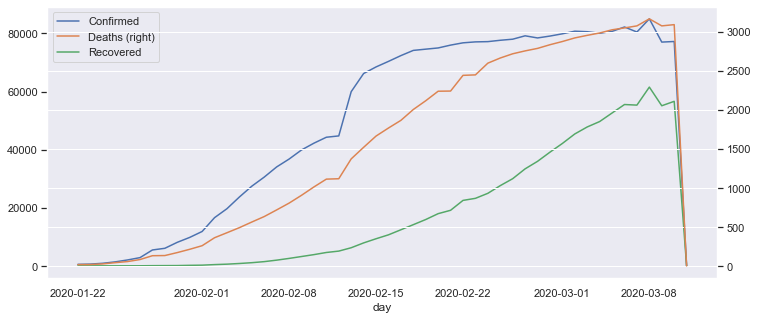

In [28]:
china_df.plot(secondary_y=['Deaths'], figsize=(12,5));

In [241]:
epidemie_df['Country/Region'].value_count()

AttributeError: 'Series' object has no attribute 'value_count'

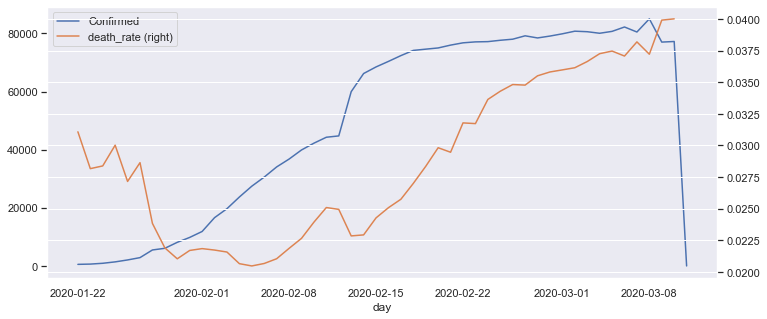

In [29]:
(china_df
 .assign(death_rate=lambda _df: _df['Deaths'] / _df['Confirmed'])[['Confirmed', 'death_rate']]
 .plot(secondary_y=['death_rate'], figsize=(12,5))
);

In [30]:
EUROPE = [ 'Italie','Germany','UK','Spain']

In [31]:
import matplotlib.pyplot as plt

In [249]:
epidemie_df['Country/Region'].values()

TypeError: 'numpy.ndarray' object is not callable

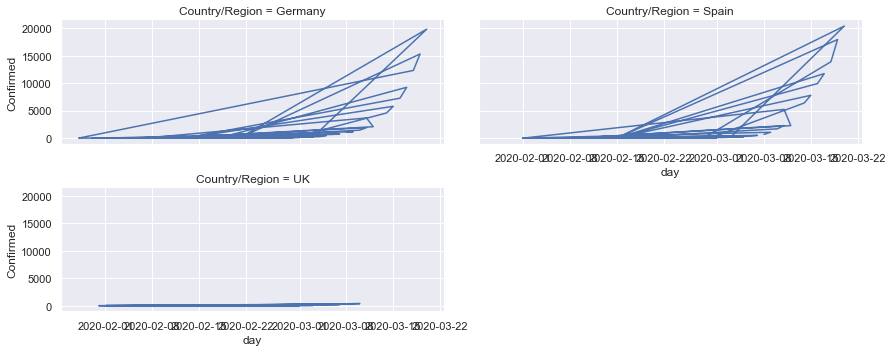

In [32]:


g = sns.FacetGrid(epidemie_df[epidemie_df['Country/Region'].isin(EUROPE)],
                  col="Country/Region", col_wrap=2, height=2.5, aspect=2.5)
g = g.map(plt.plot, "day", "Confirmed");

In [251]:
#conda install -c plotly chart-studio

#import chart_studio.plotly as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, plot, iplot

In [252]:
france_df = epidemie_df[epidemie_df['Country/Region'] == 'France']

In [256]:
UK_df=epidemie_df[epidemie_df['Country/Region'] == 'UK']

In [257]:
import plotly.offline as py
import plotly.graph_objs as go

In [261]:
data = [go.Scatter(x=UK_df['day'],
                   y=UK_df['Confirmed'],
                   name='Confirmés/France'
                  ),
        go.Scatter(x=epidemie_df[epidemie_df['Country/Region'] == 'Spain']['day'],
                   y=epidemie_df[epidemie_df['Country/Region'] == 'Spain']['Confirmed'],
                   name='Confirmés/Allemagne'
                  )
       ]

layout = dict(
    title = "Epidémie Corona Virus",
    xaxis = dict(range = ['2020-01-22', '2020-03-20'])
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

In [262]:
py.iplot(data)

In [263]:
data

[Scatter({
     'name': 'Confirmés/France',
     'x': array([datetime.date(2020, 2, 24), datetime.date(2020, 2, 27),
                 datetime.date(2020, 2, 16), datetime.date(2020, 2, 16),
                 datetime.date(2020, 3, 10), datetime.date(2020, 2, 12),
                 datetime.date(2020, 2, 12), datetime.date(2020, 3, 7),
                 datetime.date(2020, 3, 6), datetime.date(2020, 2, 1),
                 datetime.date(2020, 2, 1), datetime.date(2020, 2, 7),
                 datetime.date(2020, 2, 7), datetime.date(2020, 3, 1),
                 datetime.date(2020, 2, 1), datetime.date(2020, 2, 1),
                 datetime.date(2020, 1, 31), datetime.date(2020, 2, 16),
                 datetime.date(2020, 2, 16), datetime.date(2020, 2, 12),
                 datetime.date(2020, 2, 12), datetime.date(2020, 3, 4),
                 datetime.date(2020, 3, 5), datetime.date(2020, 2, 1),
                 datetime.date(2020, 2, 7), datetime.date(2020, 2, 10),
                 dat

In [82]:
réfléchir à une visualisation
est ce qu'on peut trouver une info sur le nb de voyageurs dans les aéroports ?
Démographie
Modélisation de propogation d'épidémie en série chronologique (packages R)

SyntaxError: invalid syntax (<ipython-input-82-2574e76f8842>, line 1)

In [41]:
import yaml

ENV_FILE='../env.yaml'
with open(ENV_FILE) as f:
    params = yaml.load(f, Loader=yaml.FullLoader)

In [42]:
params

{'directories': {'processed': '../data/processed/', 'raw': '../data/raw/'},
 'files': {'all': 'all_data.csv'}}